In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and Exploring Datasets 

In [ ]:
mainDataFrame = pd.read_csv('/content/drive/MyDrive/Ali Bin Ejaz/ModelEvaluationData/haberman.csv')
mainDataFrame

,Age_of_patient_at_time_of_operation,Patient_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
len(mainDataFrame.columns)

4

In [ ]:
mainDataFrame.columns

Index(['Age_of_patient_at_time_of_operation', 'Patient_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

In [ ]:
mainDataFrame.describe()

,Age_of_patient_at_time_of_operation,Patient_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
mainDataFrame.isnull()

,Age_of_patient_at_time_of_operation,Patient_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False
304,False,False,False,False


## Analyzing and Normalizing Data

In [ ]:
meanAge = mainDataFrame['Age_of_patient_at_time_of_operation'].mean()
meanYear = mainDataFrame['Patient_year_of_operation'].mean()
meanAuxNodes = mainDataFrame['Number_of_positive_axillary_nodes_detected'].mean()


mainDataFrame["Age_of_patient_at_time_of_operation"].fillna(meanAge, inplace = True) 
mainDataFrame["Patient_year_of_operation"].fillna(meanYear, inplace = True) 
mainDataFrame["Number_of_positive_axillary_nodes_detected"].fillna(meanAuxNodes, inplace = True) 

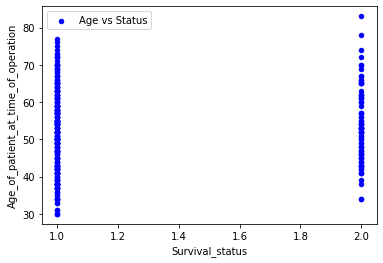

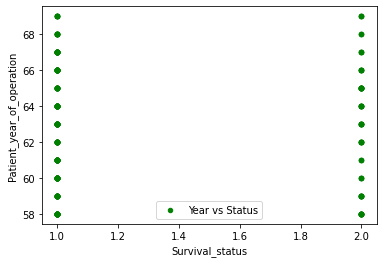

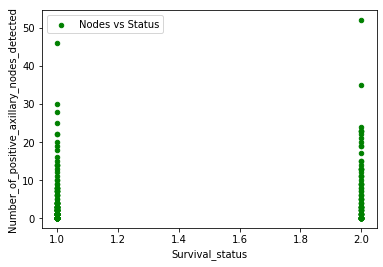

In [ ]:
mainDataFrame.plot(kind = 'scatter', x="Survival_status", y="Age_of_patient_at_time_of_operation", color="b", label="Age vs Status")
mainDataFrame.plot(kind = 'scatter', x="Survival_status", y="Patient_year_of_operation", color="g", label="Year vs Status")
mainDataFrame.plot(kind = 'scatter', x="Survival_status", y="Number_of_positive_axillary_nodes_detected", color="g", label="Nodes vs Status")
plt.show()

In [ ]:
mainDataFrame.loc[mainDataFrame['Number_of_positive_axillary_nodes_detected'] > 33 , 'Number_of_positive_axillary_nodes_detected'] = meanAuxNodes

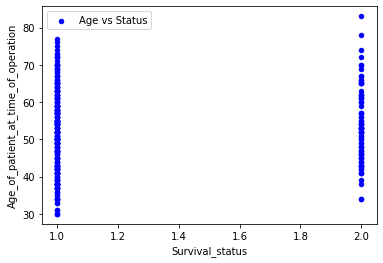

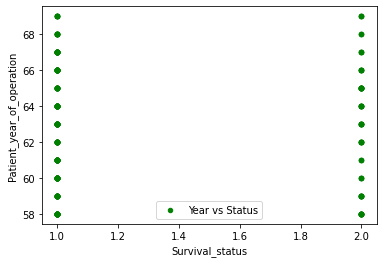

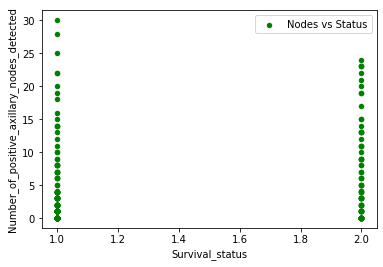

In [ ]:
mainDataFrame.plot(kind = 'scatter', x="Survival_status", y="Age_of_patient_at_time_of_operation", color="b", label="Age vs Status")
mainDataFrame.plot(kind = 'scatter', x="Survival_status", y="Patient_year_of_operation", color="g", label="Year vs Status")
mainDataFrame.plot(kind = 'scatter', x="Survival_status", y="Number_of_positive_axillary_nodes_detected", color="g", label="Nodes vs Status")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaledDF = pd.DataFrame(mainDataFrame)
scaledDF['Age_of_patient_at_time_of_operation'] = min_max_scaler.fit_transform(mainDataFrame[['Age_of_patient_at_time_of_operation']])
scaledDF['Patient_year_of_operation'] = min_max_scaler.fit_transform(mainDataFrame[['Patient_year_of_operation']])
scaledDF['Number_of_positive_axillary_nodes_detected'] = min_max_scaler.fit_transform(mainDataFrame[['Number_of_positive_axillary_nodes_detected']])

scaledDF

,Age_of_patient_at_time_of_operation,Patient_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,0.000000,0.545455,0.033333,1
1,0.000000,0.363636,0.100000,1
2,0.000000,0.636364,0.000000,1
3,0.018868,0.090909,0.066667,1
4,0.018868,0.636364,0.133333,1
...,...,...,...,...
301,0.849057,0.363636,0.033333,1
302,0.867925,0.818182,0.000000,1
303,0.886792,0.636364,0.100000,1
304,0.905660,0.636364,0.033333,2


## Data Processing for Model Evaluations

In [ ]:
Y = scaledDF[['Survival_status']]
X = scaledDF[['Age_of_patient_at_time_of_operation', 'Patient_year_of_operation', 'Number_of_positive_axillary_nodes_detected']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=20, stratify=Y)

In [ ]:

# split imbalanced dataset into train and test sets with stratification
from collections import Counter
print(y_train.value_counts())
print(y_test.value_counts())

Survival_status
1                  113
2                   40
dtype: int64
Survival_status
1                  112
2                   41
dtype: int64


## **All Models**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()

modelNB.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred_nb = modelNB.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred_nb).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test, y_pred_nb)
print('Classification report : \n',matrix)

Accuracy: 0.7647058823529411
Confusion matrix : 
 [[108   4]
 [ 32   9]]
Outcome values : 
 108 4 32 9
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.96      0.86       112
           2       0.69      0.22      0.33        41

    accuracy                           0.76       153
   macro avg       0.73      0.59      0.60       153
weighted avg       0.75      0.76      0.72       153



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='liblinear', random_state=0)
modelLR.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_lr = modelLR.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred_lr).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test, y_pred_lr)
print('Classification report : \n',matrix)

Accuracy: 0.7254901960784313
Confusion matrix : 
 [[109   3]
 [ 39   2]]
Outcome values : 
 109 3 39 2
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.97      0.84       112
           2       0.40      0.05      0.09        41

    accuracy                           0.73       153
   macro avg       0.57      0.51      0.46       153
weighted avg       0.65      0.73      0.64       153



## Decision Tree (Entropy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDTE = DecisionTreeClassifier(criterion='entropy')
modelDTE.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dte = modelDTE.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dte))

matrix = confusion_matrix(y_test, y_pred_dte)
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred_dte).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test, y_pred_dte)
print('Classification report : \n',matrix)

Accuracy: 0.6666666666666666
Confusion matrix : 
 [[87 25]
 [26 15]]
Outcome values : 
 87 25 26 15
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.78      0.77       112
           2       0.38      0.37      0.37        41

    accuracy                           0.67       153
   macro avg       0.57      0.57      0.57       153
weighted avg       0.66      0.67      0.67       153



## Decision Tree (Entorpy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDTG = DecisionTreeClassifier(criterion='gini')
modelDTG.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtg = modelDTG.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtg))

matrix = confusion_matrix(y_test, y_pred_dtg)
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred_dtg).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test, y_pred_dtg)
print('Classification report : \n',matrix)

Accuracy: 0.6405228758169934
Confusion matrix : 
 [[84 28]
 [27 14]]
Outcome values : 
 84 28 27 14
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.75      0.75       112
           2       0.33      0.34      0.34        41

    accuracy                           0.64       153
   macro avg       0.55      0.55      0.55       153
weighted avg       0.64      0.64      0.64       153

